In [1]:
import os
import librosa   #for audio processing
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing

import warnings
warnings.filterwarnings("ignore")

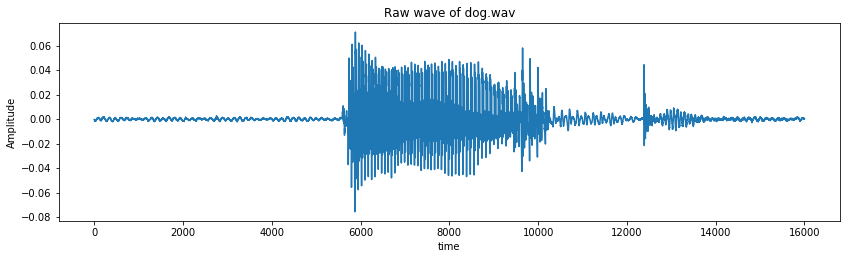

In [2]:
train_audio_path = "./train/train/audio/bed/"
samples, sample_rate = librosa.load(train_audio_path+'00f0204f_nohash_0.wav',sr=16000)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + 'dog.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(samples)

In [3]:
ipd.Audio(samples, rate=sample_rate)
print(sample_rate)

16000


In [4]:
samples = librosa.resample(samples, sample_rate, 8000)
ipd.Audio(samples, rate=8000)

['00176480_nohash_0.wav', '004ae714_nohash_0.wav', '004ae714_nohash_1.wav', '00f0204f_nohash_0.wav', '00f0204f_nohash_1.wav', '012c8314_nohash_0.wav', '012c8314_nohash_1.wav', '0132a06d_nohash_0.wav', '0135f3f2_nohash_0.wav', '0137b3f4_nohash_0.wav', '014f9f65_nohash_0.wav', '01648c51_nohash_0.wav', '01648c51_nohash_1.wav', '016e2c6d_nohash_0.wav', '01b4757a_nohash_0.wav', '01b4757a_nohash_1.wav', '01bcfc0c_nohash_0.wav', '0227998e_nohash_0.wav', '026290a7_nohash_0.wav', '02746d24_nohash_0.wav', '035de8fe_nohash_0.wav', '0362539c_nohash_0.wav', '0362539c_nohash_1.wav', '037c445a_nohash_0.wav', '0397ecda_nohash_0.wav', '03c96658_nohash_0.wav', '042186b8_nohash_0.wav', '042ea76c_nohash_0.wav', '0447d7c1_nohash_0.wav', '0474c92a_nohash_0.wav', '0474c92a_nohash_1.wav', '05739450_nohash_0.wav', '05b2db80_nohash_0.wav', '05d18852_nohash_0.wav', '06076b6b_nohash_0.wav', '060cd039_nohash_0.wav', '060cd039_nohash_1.wav', '063d48cf_nohash_0.wav', '063d48cf_nohash_1.wav', '0685264e_nohash_0.wav',

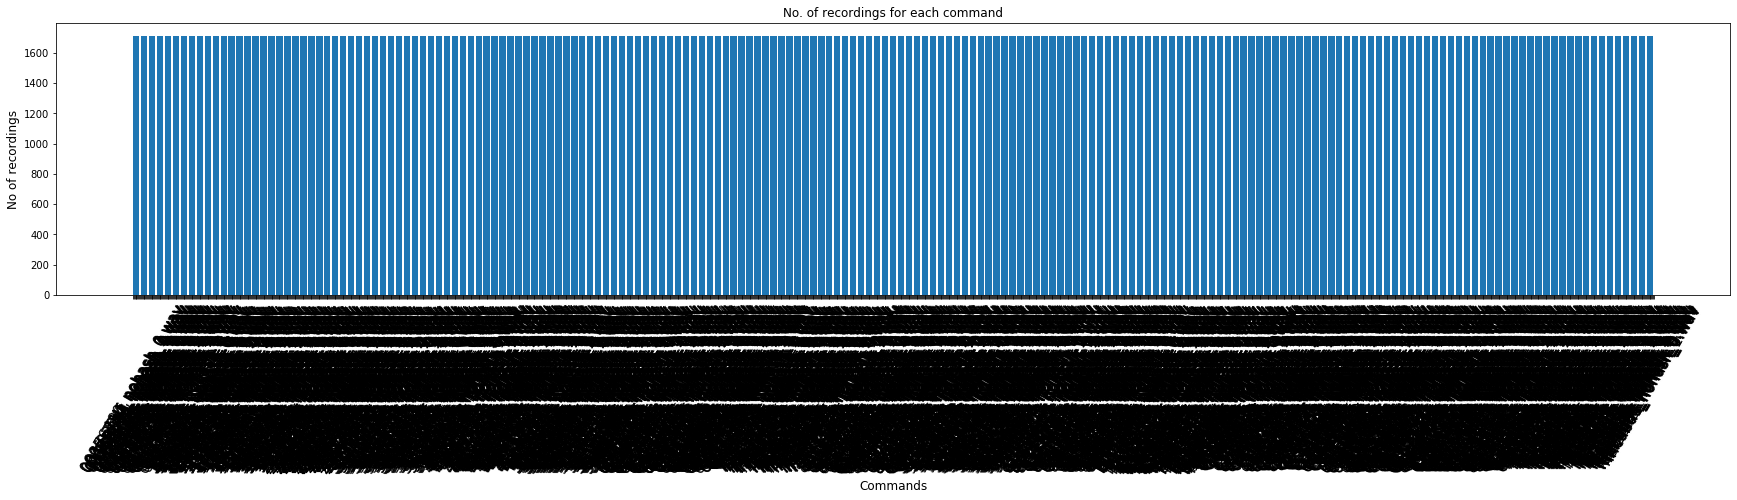

In [5]:

labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]

#for label in labels:
#    waves = [f for f in os.listdir(train_audio_path ) if f.endswith('.wav')]
#    print(waves)
#    no_of_recordings.append(len(waves))
    
waves = [f for f in os.listdir(train_audio_path ) if f.endswith('.wav')]
print(waves)
no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()


In [6]:

labels=["yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"]

In [7]:
train_audio_path = "./train/train/audio/"

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [9]:

from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

Using TensorFlow backend.


In [10]:

all_wave = np.array(all_wave).reshape(-1,8000)

In [11]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.3,random_state=777,shuffle=True)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
tree_entropy1 = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=20, min_samples_leaf=5)
history = tree_entropy1.fit(x_tr,y_tr)

In [14]:
y_pred_gini1 = tree_entropy1.predict(x_val)

In [15]:
from sklearn.metrics import accuracy_score

In [24]:
print("Accuracy for Ranodm Forest Tree with criteria as Entropy Index (depth 20)is: ", accuracy_score(y_val,y_pred_gini1)*100)

Accuracy for Ranodm Forest Tree with criteria as Entropy Index (depth 20)is:  10.384735689709103


In [17]:

def predict(audio):
    prob=tree_entropy1.predict(audio.reshape(-1,8000))
    index=np.argmax(prob[0])
    return classes[index]

In [18]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)

Audio: right


In [19]:
print("Text:",predict(samples))

Text: stop


In [20]:
tree_entropy2 = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                                      max_depth=60, min_samples_leaf=5)
history = tree_entropy2.fit(x_tr,y_tr)

In [21]:
y_pred_entropy2 = tree_entropy2.predict(x_val)

In [25]:
print("Accuracy for Ranodm Forest Tree with criteria as Entropy Index (depth60)is: ", accuracy_score(y_val,y_pred_entropy2)*100)

Accuracy for Ranodm Forest Tree with criteria as Entropy Index (depth60)is:  11.714106975289333
